In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime

In [2]:
# define parameters 

ticker = 'NFLX'
startDate = '2022-12-02'
endDate = '2022-12-03'
dataInterval = '5m'

fastSMA = 20 #9
normalSMA = 100 #50
slowSMA = 200 #200

# moving average period
rollingPeriod = 21

# entry ratio
entryPercentile = 0.10

# exit ratio
exitPercentile = 0.90

In [3]:
# get data
df = yf.download(ticker, startDate, endDate, interval = dataInterval)
df.reset_index(inplace=True)

df['Date'] = df['Datetime'].dt.date

[*********************100%***********************]  1 of 1 completed


In [4]:
# df_sample = df[df['Date']==datetime.date(2022, 12, 9)]
df_sample = df.reset_index()

In [5]:
df_sample

,index,Datetime,Open,High,Low,Close,Adj Close,Volume,Date
0,0,2022-12-09 16:00:00-05:00,320.01001,320.01001,320.01001,320.01001,320.01001,0,2022-12-09


In [294]:
min_Low = []
min_Close = []
max_High = []
max_Close = []
for i in range(1,len(df_sample)):
    min_Close.append(df_sample['Datetime'][df_sample[:i]['Close'].idxmin()])
    max_Close.append(df_sample['Datetime'][df_sample[:i]['Close'].idxmax()])
    min_Low.append(df_sample['Datetime'][df_sample[:i]['Low'].idxmin()])
    max_High.append(df_sample['Datetime'][df_sample[:i]['High'].idxmax()])

In [295]:
data = {'ticker': [ticker] * len(min_Low),
        'Date': df_sample['Datetime'][1:],
        'dataInterval': [dataInterval] * len(min_Low),
        'min_Low': min_Low,
        'min_Close': min_Close,
        'max_High': max_High,
        'max_Close': max_Close
       }
data = pd.DataFrame(data)

max_High = data['max_High'].value_counts().reset_index().sort_values('max_High', ascending=False).loc[0]['index']
min_Low = data['min_Low'].value_counts().reset_index().sort_values('min_Low', ascending=False).loc[0]['index']
min_Close = data['min_Close'].value_counts().reset_index().sort_values('min_Close', ascending=False).loc[0]['index']
max_Close = data['max_Close'].value_counts().reset_index().sort_values('max_Close', ascending=False).loc[0]['index']


In [296]:
data['max_Close'].value_counts().reset_index()

,index,max_Close
0,2022-12-05 09:45:00-05:00,75
1,2022-12-05 09:35:00-05:00,2
2,2022-12-05 09:30:00-05:00,1


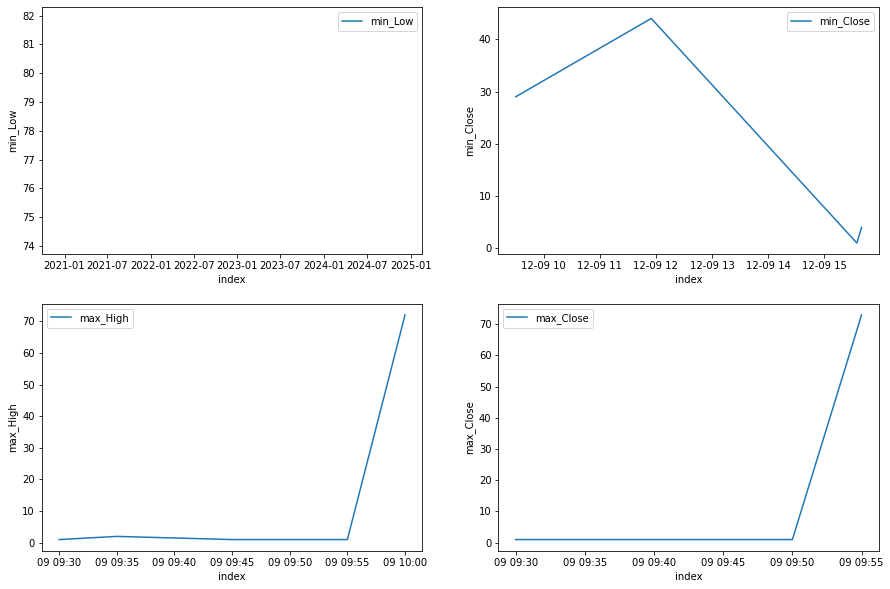

In [38]:
fig = plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
x = data['min_Low'].value_counts().reset_index().sort_values('index')
sns.lineplot(x=x['index'],y=x['min_Low'], label='min_Low')

plt.subplot(2,2,2)
x = data['min_Close'].value_counts().reset_index().sort_values('index')
sns.lineplot(x=x['index'],y=x['min_Close'], label='min_Close')

plt.subplot(2,2,3)
x = data['max_High'].value_counts().reset_index().sort_values('index')
sns.lineplot(x=x['index'],y=x['max_High'], label='max_High')

plt.subplot(2,2,4)
x = data['max_Close'].value_counts().reset_index().sort_values('index')
sns.lineplot(x=x['index'],y=x['max_Close'], label='max_Close')

plt.show()

In [9]:
def getDailyStats(ticker, startDate, endDate, dataInterval):
    # get data
    df = yf.download(ticker, startDate, endDate, interval = dataInterval)
    df.reset_index(inplace=True)
    if len(df) < 2:
        pass
    else:

        df['Date'] = df['Datetime'].dt.date
        df_sample = df.reset_index()

        min_Low = []
        min_Close = []
        max_High = []
        max_Close = []
        for i in range(1,len(df_sample)):
            min_Close.append(df_sample['Datetime'][df_sample[:i]['Close'].idxmin()])
            max_Close.append(df_sample['Datetime'][df_sample[:i]['Close'].idxmax()])
            min_Low.append(df_sample['Datetime'][df_sample[:i]['Low'].idxmin()])
            max_High.append(df_sample['Datetime'][df_sample[:i]['High'].idxmax()])


        data = {'ticker': [ticker] * len(min_Low),
            'Date': df_sample['Datetime'][1:],
            'dataInterval': [dataInterval] * len(min_Low),
            'min_Low': min_Low,
            'min_Close': min_Close,
            'max_High': max_High,
            'max_Close': max_Close
           }
        data = pd.DataFrame(data)

        max_High = data['max_High'].value_counts().reset_index().sort_values('max_High', ascending=False).loc[0]['index']
        min_Low = data['min_Low'].value_counts().reset_index().sort_values('min_Low', ascending=False).loc[0]['index']
        min_Close = data['min_Close'].value_counts().reset_index().sort_values('min_Close', ascending=False).loc[0]['index']
        max_Close = data['max_Close'].value_counts().reset_index().sort_values('max_Close', ascending=False).loc[0]['index']


        data = {'ticker': ticker,
            'Date': startDate,
            'dataInterval': dataInterval,
            'min_Low': min_Low,
            'min_Close': min_Close,
            'max_High': max_High,
            'max_Close': max_Close
           }
        return data

In [296]:

tickers = [ 'AAPL',  'MSFT',  'GOOG',  'GOOGL',  'AMZN',  'TSLA',  'UNH',  'JNJ',  'V',  'XOM',  'TSM',  'NVDA',  'WMT',  'TCTZF',  'TCEHY',  'JPM',  'LVMHF',  'LVMUY',  'PG',  'LLY',  'MA',  'HD',  'CVX',  'NSRGF',  'NSRGY',  'RHHBF',  'META',  'PFE',  'NVO',  'NONOF',  'ABBV',  'MRK',  'KO',  'BAC',  'RHHBY',  'RHHVF',  'PEP',  'BABAF',  'BABA',  'ASMLF',  'ASML',  'AVGO',  'TMO',
            'AZN',  'ORCL',  'COST',  'PROSY',  
            'LRLCY',  'MCD',  'CSCO',  'LRLCF',  'RYDAF',    'TOYOF',  'DHR',  'SHEL',  'NVS',  'TM',  'ABT',  'ACN',  'IDCBY',  'TMUS',  'NKE',  'DIS',  'NEE',  'BMY', 
            'HESAF',  'HESAY',  'LIN',  'WFC',  'BHP',  'BHPLF',  'PM',  'TXN',  'VZ',  'ADBE',  'UPS',  'CMCSA',  'MS',  'CICHY',  'SCHW',  'AMGN',   
            'RTX',  'MPNGY',    'HON',  
            'COP',  'T',  'CIHKY',  'CVS',  'QCOM',  'IBM',  'RY',  'DE',  'CRM',  
            'UNLYF',  'UNP',  'AAIGF',  'AAGIY',  'HDB',  'UL',  'RTNTF',  'LMT',  'PIAIF',  'SAP',  'ELV',  'SAPGF',  'LOW',  'GS',  'HSBC',  'PNGAY', 
            'TD',  'CMWAY',  'HBCYF',   'BUDFF',  'CAT',  'BUD',  'RIO',  'SNY',  'SBUX',  'INTC',  'ACGBY',   
            'AXP',  'PDD',  'SPGI',  'SMAWF',  'INTU',  'SIEGY',  'EQNR',  'AMD',  
            'GILD',  'PLD',  'BA',  'ADP',  'BLK',  'DEO',  'MDT',  
            'BP',  'CI',    'AMT',  'SONY',  'VWAGY',  'BTI',  'SYK',  'AMAT', 
            'JDCMF',  'JD',  'CB',  'TJX',  'GE',  'ALIZF',  'C',  'ALIZY',  'ADI',  'EL',  'GLCNF',  'MMC',  'GLNCY',  'CNI',  'PYPL',  'MO',  'ESLOY',  'ESLOF',  'MKGAF',  'MKKGY',  'REGN',  'NOC',  'SBGSF',  'SBGSY',  'PCCYF',  'IDEXF',  'VRTX',  'NOW',  'IDEXY',  'IBN',  'ENB',  'VALE',  'BYDDF',  'BYDDY',  'BKNG',  'INFY',  'DUK',  'PGR',  'SO',  'GSK',  'CP',
            'ZTS',  'EOG',  'IBDSF',  'BAM',  'IBDRY',  'MUFG',  'BDX',  'TGT',  'PBR',  'APD',  'MMM',  'WM',  'BNPQY',  'BNPQF',  'MRNA',  'GD',  
            'HUM',  'ITW',  'PPRUY',  'HCA',  'PPRUF',  'PBCRY',  'SLB',  'BSX',  'CSX',  'USB',  'SHW',  'SFTBY',  'SFTBF',  'CL',  'NABZY',  'KDDIF',  'CME',  'FISV',  'KDDIY',  'DBSDY',  'AON',  'DBSDF',  'ETN',  'FRCOY',  'BMO',  'EQIX',  'WMMVY',  'WMMVF',
            'PNC',  'DSNKY',   'CCI',  'CNQ',   'ABNB',  'BNS',  'MU', 'CHTR',    'SMMNY',  'ATVI',   'ABB',  'VCISY',  'ABLZF',  'UBS',  'AMX',  'ICE',  'BX',  'AMOV',  'OXY',  'CSUAY',  'MET',  'NSC',  'PSTVY',  'TFC',  
            'EMR',  'ATLCY',    'FCX',  'TRI',  'ENLAY',   'RELX',  'BAYRY',  'BAYZF',  'DG',  'RLXXF',  'GM', 
            'KDP',  'F',  'UBER',  'MCO',  'MCK',  'SAFRF',  'SAFRY',  'PSA',  'MNST',  'NGLOY',  'EPD',  'TOELY',  'AAUKF',  'TOELF',  'ORLY',  'RBGLY',  'VMW',  'SOBKY',  'RBGPF',  'MAR',  'GIS',  'PXD',  'SRE',  'SHECY',  'ADM',  'SHECF',  'LDNXF',  'SFBQF',  'LNSTY',  'PRNDY',  'RCRRF',  'PDRDF',  'MPC',  'RCRUY',  'SNPS',  'AEP',  'E', 
            'KHC',  'SAN',  'NTDOF',  'DPSGY',  'CNC',  'SHOP',   'D',  'HSY',  'DPSTF',  'NTDOY',  'MSBHF',  'HTHIF',  'ECIFY',  'PANW',  'ANZBY',  'DASTF',  
            'DASTY',  'OLCLY',  'TAK',   'SNOW',  'AIG',  'STLA',  'PSX',    'AZO',  'NTES',  'CTAS',  'KMB',  'ABEV',  'BASFY',  'ANCTF',  'ITOCY',  'EW',  'ROP',  'ADYEY',  'HNHPF',  'NGG',
            'JCI',  'A',  'MELI',  'CTVA',  'DXCM',  'CDNS',  'ITUB',  'FDX',  'STZ', 
            'MSI',  'VLO',  'MQBKY',  'NXPI',  
            'WDS',  'ING',  'WDAY',  'CILJF',  'TRV',  'AFL',  'CHGCY',  'ENPH',  'UNVGY',  'PAYX',  'RSG',  'ECL',  'UMGNF',  'IFNNY',  'IFNNF',  'BCE',  'CMG',  'TRP',  'ADSK',  'BAIDF',  'MCHP',  'FIS',  'SYY',  'LULU',  'BIDU', 
            'KKR',  'BNTX',   'EXC',   'BIIB',  'LHX',  'TKOMY',  'FTNT',  'OVCHY',  'TKOMF',  'HMC',  'BDWBY',  'AJG',  'O',  'TT',  'RACE',  'NTR']

startDate = ['2022-10-31','2022-11-01','2022-11-02','2022-11-03','2022-11-04',
            '2022-11-07','2022-11-08','2022-11-09','2022-11-10','2022-11-11',
             '2022-11-14','2022-11-15','2022-11-16','2022-11-17','2022-11-18',
             '2022-11-28','2022-11-29','2022-11-30','2022-12-01','2022-12-02',
             '2022-12-05','2022-12-06', '2022-12-07','2022-12-08','2022-12-09',]
endDate = startDate[1:] + ['2023-12-31']
dataInterval = '5m'

query = []
for i in range(len(startDate)):
    data = {'ticker': tickers[:100] ,
            'startDate': startDate[i],
            'endDate': startDate[i]  ,
            'dataInterval': [dataInterval] * 100
        }
    query.append(pd.DataFrame(data))
query = pd.concat(query)

In [141]:
output = []
for i in range(0, len(query)):
    print(query['ticker'][i],query['startDate'][i], i, 'out of',len(query))
    
    output.append(getDailyStats(query['ticker'][i],
                                  query['startDate'][i],
                                  query['endDate'][i],
                                  query['dataInterval'][i]))
    
    

AAPL 2022-10-31 0 out of 2500
[*********************100%***********************]  1 of 1 completed
MSFT 2022-11-01 1 out of 2500
[*********************100%***********************]  1 of 1 completed
GOOG 2022-11-02 2 out of 2500
[*********************100%***********************]  1 of 1 completed
GOOGL 2022-11-03 3 out of 2500
[*********************100%***********************]  1 of 1 completed
AMZN 2022-11-04 4 out of 2500
[*********************100%***********************]  1 of 1 completed
TSLA 2022-11-07 5 out of 2500
[*********************100%***********************]  1 of 1 completed
UNH 2022-11-08 6 out of 2500
[*********************100%***********************]  1 of 1 completed
JNJ 2022-11-09 7 out of 2500
[*********************100%***********************]  1 of 1 completed
V 2022-11-10 8 out of 2500
[*********************100%***********************]  1 of 1 completed
XOM 2022-11-11 9 out of 2500
[*********************100%***********************]  1 of 1 completed
TSM 2022-11-14 

[*********************100%***********************]  1 of 1 completed
MPNGY 2022-11-09 82 out of 2500
[*********************100%***********************]  1 of 1 completed
HON 2022-11-10 83 out of 2500
[*********************100%***********************]  1 of 1 completed
COP 2022-11-11 84 out of 2500
[*********************100%***********************]  1 of 1 completed
T 2022-11-14 85 out of 2500
[*********************100%***********************]  1 of 1 completed
CIHKY 2022-11-15 86 out of 2500
[*********************100%***********************]  1 of 1 completed
CVS 2022-11-16 87 out of 2500
[*********************100%***********************]  1 of 1 completed
QCOM 2022-11-17 88 out of 2500
[*********************100%***********************]  1 of 1 completed
IBM 2022-11-18 89 out of 2500
[*********************100%***********************]  1 of 1 completed
RY 2022-11-28 90 out of 2500
[*********************100%***********************]  1 of 1 completed
DE 2022-11-29 91 out of 2500
[********

DIS 2022-11-16 162 out of 2500
[*********************100%***********************]  1 of 1 completed
NEE 2022-11-17 163 out of 2500
[*********************100%***********************]  1 of 1 completed
BMY 2022-11-18 164 out of 2500
[*********************100%***********************]  1 of 1 completed
HESAF 2022-11-28 165 out of 2500
[*********************100%***********************]  1 of 1 completed
HESAY 2022-11-29 166 out of 2500
[*********************100%***********************]  1 of 1 completed
LIN 2022-11-30 167 out of 2500
[*********************100%***********************]  1 of 1 completed
WFC 2022-12-01 168 out of 2500
[*********************100%***********************]  1 of 1 completed
BHP 2022-12-02 169 out of 2500
[*********************100%***********************]  1 of 1 completed
BHPLF 2022-12-05 170 out of 2500
[*********************100%***********************]  1 of 1 completed
PM 2022-12-06 171 out of 2500
[*********************100%***********************]  1 of 1 compl

[*********************100%***********************]  1 of 1 completed
AZN 2022-12-01 243 out of 2500
[*********************100%***********************]  1 of 1 completed
ORCL 2022-12-02 244 out of 2500
[*********************100%***********************]  1 of 1 completed
COST 2022-12-05 245 out of 2500
[*********************100%***********************]  1 of 1 completed
PROSY 2022-12-06 246 out of 2500
[*********************100%***********************]  1 of 1 completed
LRLCY 2022-12-07 247 out of 2500
[*********************100%***********************]  1 of 1 completed
MCD 2022-12-08 248 out of 2500
[*********************100%***********************]  1 of 1 completed
CSCO 2022-12-09 249 out of 2500
[*********************100%***********************]  1 of 1 completed
LRLCF 2022-10-31 250 out of 2500
[*********************100%***********************]  1 of 1 completed
RYDAF 2022-11-01 251 out of 2500
[*********************100%***********************]  1 of 1 completed
TOYOF 2022-11-02 252

[*********************100%***********************]  1 of 1 completed
NSRGY 2022-12-09 324 out of 2500
[*********************100%***********************]  1 of 1 completed
RHHBF 2022-10-31 325 out of 2500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- RHHBF: No data found for this date range, symbol may be delisted
META 2022-11-01 326 out of 2500
[*********************100%***********************]  1 of 1 completed
PFE 2022-11-02 327 out of 2500
[*********************100%***********************]  1 of 1 completed
NVO 2022-11-03 328 out of 2500
[*********************100%***********************]  1 of 1 completed
NONOF 2022-11-04 329 out of 2500
[*********************100%***********************]  1 of 1 completed
ABBV 2022-11-07 330 out of 2500
[*********************100%***********************]  1 of 1 completed
MRK 2022-11-08 331 out of 2500
[*********************100%***********************]  1 of 1 completed
KO 2022-11-09 332 out of 2500
[*****

[*********************100%***********************]  1 of 1 completed
AMZN 2022-11-04 404 out of 2500
[*********************100%***********************]  1 of 1 completed
TSLA 2022-11-07 405 out of 2500
[*********************100%***********************]  1 of 1 completed
UNH 2022-11-08 406 out of 2500
[*********************100%***********************]  1 of 1 completed
JNJ 2022-11-09 407 out of 2500
[*********************100%***********************]  1 of 1 completed
V 2022-11-10 408 out of 2500
[*********************100%***********************]  1 of 1 completed
XOM 2022-11-11 409 out of 2500
[*********************100%***********************]  1 of 1 completed
TSM 2022-11-14 410 out of 2500
[*********************100%***********************]  1 of 1 completed
NVDA 2022-11-15 411 out of 2500
[*********************100%***********************]  1 of 1 completed
WMT 2022-11-16 412 out of 2500
[*********************100%***********************]  1 of 1 completed
TCTZF 2022-11-17 413 out of 25

[*********************100%***********************]  1 of 1 completed
COP 2022-11-11 484 out of 2500
[*********************100%***********************]  1 of 1 completed
T 2022-11-14 485 out of 2500
[*********************100%***********************]  1 of 1 completed
CIHKY 2022-11-15 486 out of 2500
[*********************100%***********************]  1 of 1 completed
CVS 2022-11-16 487 out of 2500
[*********************100%***********************]  1 of 1 completed
QCOM 2022-11-17 488 out of 2500
[*********************100%***********************]  1 of 1 completed
IBM 2022-11-18 489 out of 2500
[*********************100%***********************]  1 of 1 completed
RY 2022-11-28 490 out of 2500
[*********************100%***********************]  1 of 1 completed
DE 2022-11-29 491 out of 2500
[*********************100%***********************]  1 of 1 completed
CRM 2022-11-30 492 out of 2500
[*********************100%***********************]  1 of 1 completed
UNLYF 2022-12-01 493 out of 2500

[*********************100%***********************]  1 of 1 completed
BMY 2022-11-18 564 out of 2500
[*********************100%***********************]  1 of 1 completed
HESAF 2022-11-28 565 out of 2500
[*********************100%***********************]  1 of 1 completed
HESAY 2022-11-29 566 out of 2500
[*********************100%***********************]  1 of 1 completed
LIN 2022-11-30 567 out of 2500
[*********************100%***********************]  1 of 1 completed
WFC 2022-12-01 568 out of 2500
[*********************100%***********************]  1 of 1 completed
BHP 2022-12-02 569 out of 2500
[*********************100%***********************]  1 of 1 completed
BHPLF 2022-12-05 570 out of 2500
[*********************100%***********************]  1 of 1 completed
PM 2022-12-06 571 out of 2500
[*********************100%***********************]  1 of 1 completed
TXN 2022-12-07 572 out of 2500
[*********************100%***********************]  1 of 1 completed
VZ 2022-12-08 573 out of 2

[*********************100%***********************]  1 of 1 completed
ORCL 2022-12-02 644 out of 2500
[*********************100%***********************]  1 of 1 completed
COST 2022-12-05 645 out of 2500
[*********************100%***********************]  1 of 1 completed
PROSY 2022-12-06 646 out of 2500
[*********************100%***********************]  1 of 1 completed
LRLCY 2022-12-07 647 out of 2500
[*********************100%***********************]  1 of 1 completed
MCD 2022-12-08 648 out of 2500
[*********************100%***********************]  1 of 1 completed
CSCO 2022-12-09 649 out of 2500
[*********************100%***********************]  1 of 1 completed
LRLCF 2022-10-31 650 out of 2500
[*********************100%***********************]  1 of 1 completed
RYDAF 2022-11-01 651 out of 2500
[*********************100%***********************]  1 of 1 completed
TOYOF 2022-11-02 652 out of 2500
[*********************100%***********************]  1 of 1 completed
DHR 2022-11-03 653

[*********************100%***********************]  1 of 1 completed
RHHBF 2022-10-31 725 out of 2500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- RHHBF: No data found for this date range, symbol may be delisted
META 2022-11-01 726 out of 2500
[*********************100%***********************]  1 of 1 completed
PFE 2022-11-02 727 out of 2500
[*********************100%***********************]  1 of 1 completed
NVO 2022-11-03 728 out of 2500
[*********************100%***********************]  1 of 1 completed
NONOF 2022-11-04 729 out of 2500
[*********************100%***********************]  1 of 1 completed
ABBV 2022-11-07 730 out of 2500
[*********************100%***********************]  1 of 1 completed
MRK 2022-11-08 731 out of 2500
[*********************100%***********************]  1 of 1 completed
KO 2022-11-09 732 out of 2500
[*********************100%***********************]  1 of 1 completed
BAC 2022-11-10 733 out of 2500
[*******

[*********************100%***********************]  1 of 1 completed
TSLA 2022-11-07 805 out of 2500
[*********************100%***********************]  1 of 1 completed
UNH 2022-11-08 806 out of 2500
[*********************100%***********************]  1 of 1 completed
JNJ 2022-11-09 807 out of 2500
[*********************100%***********************]  1 of 1 completed
V 2022-11-10 808 out of 2500
[*********************100%***********************]  1 of 1 completed
XOM 2022-11-11 809 out of 2500
[*********************100%***********************]  1 of 1 completed
TSM 2022-11-14 810 out of 2500
[*********************100%***********************]  1 of 1 completed
NVDA 2022-11-15 811 out of 2500
[*********************100%***********************]  1 of 1 completed
WMT 2022-11-16 812 out of 2500
[*********************100%***********************]  1 of 1 completed
TCTZF 2022-11-17 813 out of 2500
[*********************100%***********************]  1 of 1 completed
TCEHY 2022-11-18 814 out of 2

[*********************100%***********************]  1 of 1 completed
T 2022-11-14 885 out of 2500
[*********************100%***********************]  1 of 1 completed
CIHKY 2022-11-15 886 out of 2500
[*********************100%***********************]  1 of 1 completed
CVS 2022-11-16 887 out of 2500
[*********************100%***********************]  1 of 1 completed
QCOM 2022-11-17 888 out of 2500
[*********************100%***********************]  1 of 1 completed
IBM 2022-11-18 889 out of 2500
[*********************100%***********************]  1 of 1 completed
RY 2022-11-28 890 out of 2500
[*********************100%***********************]  1 of 1 completed
DE 2022-11-29 891 out of 2500
[*********************100%***********************]  1 of 1 completed
CRM 2022-11-30 892 out of 2500
[*********************100%***********************]  1 of 1 completed
UNLYF 2022-12-01 893 out of 2500
[*********************100%***********************]  1 of 1 completed
UNP 2022-12-02 894 out of 2500

[*********************100%***********************]  1 of 1 completed
HESAF 2022-11-28 965 out of 2500
[*********************100%***********************]  1 of 1 completed
HESAY 2022-11-29 966 out of 2500
[*********************100%***********************]  1 of 1 completed
LIN 2022-11-30 967 out of 2500
[*********************100%***********************]  1 of 1 completed
WFC 2022-12-01 968 out of 2500
[*********************100%***********************]  1 of 1 completed
BHP 2022-12-02 969 out of 2500
[*********************100%***********************]  1 of 1 completed
BHPLF 2022-12-05 970 out of 2500
[*********************100%***********************]  1 of 1 completed
PM 2022-12-06 971 out of 2500
[*********************100%***********************]  1 of 1 completed
TXN 2022-12-07 972 out of 2500
[*********************100%***********************]  1 of 1 completed
VZ 2022-12-08 973 out of 2500
[*********************100%***********************]  1 of 1 completed
ADBE 2022-12-09 974 out of 

[*********************100%***********************]  1 of 1 completed
COST 2022-12-05 1045 out of 2500
[*********************100%***********************]  1 of 1 completed
PROSY 2022-12-06 1046 out of 2500
[*********************100%***********************]  1 of 1 completed
LRLCY 2022-12-07 1047 out of 2500
[*********************100%***********************]  1 of 1 completed
MCD 2022-12-08 1048 out of 2500
[*********************100%***********************]  1 of 1 completed
CSCO 2022-12-09 1049 out of 2500
[*********************100%***********************]  1 of 1 completed
LRLCF 2022-10-31 1050 out of 2500
[*********************100%***********************]  1 of 1 completed
RYDAF 2022-11-01 1051 out of 2500
[*********************100%***********************]  1 of 1 completed
TOYOF 2022-11-02 1052 out of 2500
[*********************100%***********************]  1 of 1 completed
DHR 2022-11-03 1053 out of 2500
[*********************100%***********************]  1 of 1 completed
SHEL 2022-

[*********************100%***********************]  1 of 1 completed
RHHBF 2022-10-31 1125 out of 2500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- RHHBF: No data found for this date range, symbol may be delisted
META 2022-11-01 1126 out of 2500
[*********************100%***********************]  1 of 1 completed
PFE 2022-11-02 1127 out of 2500
[*********************100%***********************]  1 of 1 completed
NVO 2022-11-03 1128 out of 2500
[*********************100%***********************]  1 of 1 completed
NONOF 2022-11-04 1129 out of 2500
[*********************100%***********************]  1 of 1 completed
ABBV 2022-11-07 1130 out of 2500
[*********************100%***********************]  1 of 1 completed
MRK 2022-11-08 1131 out of 2500
[*********************100%***********************]  1 of 1 completed
KO 2022-11-09 1132 out of 2500
[*********************100%***********************]  1 of 1 completed
BAC 2022-11-10 1133 out of 2500

[*********************100%***********************]  1 of 1 completed
TSLA 2022-11-07 1205 out of 2500
[*********************100%***********************]  1 of 1 completed
UNH 2022-11-08 1206 out of 2500
[*********************100%***********************]  1 of 1 completed
JNJ 2022-11-09 1207 out of 2500
[*********************100%***********************]  1 of 1 completed
V 2022-11-10 1208 out of 2500
[*********************100%***********************]  1 of 1 completed
XOM 2022-11-11 1209 out of 2500
[*********************100%***********************]  1 of 1 completed
TSM 2022-11-14 1210 out of 2500
[*********************100%***********************]  1 of 1 completed
NVDA 2022-11-15 1211 out of 2500
[*********************100%***********************]  1 of 1 completed
WMT 2022-11-16 1212 out of 2500
[*********************100%***********************]  1 of 1 completed
TCTZF 2022-11-17 1213 out of 2500
[*********************100%***********************]  1 of 1 completed
TCEHY 2022-11-18 121

[*********************100%***********************]  1 of 1 completed
T 2022-11-14 1285 out of 2500
[*********************100%***********************]  1 of 1 completed
CIHKY 2022-11-15 1286 out of 2500
[*********************100%***********************]  1 of 1 completed
CVS 2022-11-16 1287 out of 2500
[*********************100%***********************]  1 of 1 completed
QCOM 2022-11-17 1288 out of 2500
[*********************100%***********************]  1 of 1 completed
IBM 2022-11-18 1289 out of 2500
[*********************100%***********************]  1 of 1 completed
RY 2022-11-28 1290 out of 2500
[*********************100%***********************]  1 of 1 completed
DE 2022-11-29 1291 out of 2500
[*********************100%***********************]  1 of 1 completed
CRM 2022-11-30 1292 out of 2500
[*********************100%***********************]  1 of 1 completed
UNLYF 2022-12-01 1293 out of 2500
[*********************100%***********************]  1 of 1 completed
UNP 2022-12-02 1294 o

[*********************100%***********************]  1 of 1 completed
HESAF 2022-11-28 1365 out of 2500
[*********************100%***********************]  1 of 1 completed
HESAY 2022-11-29 1366 out of 2500
[*********************100%***********************]  1 of 1 completed
LIN 2022-11-30 1367 out of 2500
[*********************100%***********************]  1 of 1 completed
WFC 2022-12-01 1368 out of 2500
[*********************100%***********************]  1 of 1 completed
BHP 2022-12-02 1369 out of 2500
[*********************100%***********************]  1 of 1 completed
BHPLF 2022-12-05 1370 out of 2500
[*********************100%***********************]  1 of 1 completed
PM 2022-12-06 1371 out of 2500
[*********************100%***********************]  1 of 1 completed
TXN 2022-12-07 1372 out of 2500
[*********************100%***********************]  1 of 1 completed
VZ 2022-12-08 1373 out of 2500
[*********************100%***********************]  1 of 1 completed
ADBE 2022-12-09 13

[*********************100%***********************]  1 of 1 completed
COST 2022-12-05 1445 out of 2500
[*********************100%***********************]  1 of 1 completed
PROSY 2022-12-06 1446 out of 2500
[*********************100%***********************]  1 of 1 completed
LRLCY 2022-12-07 1447 out of 2500
[*********************100%***********************]  1 of 1 completed
MCD 2022-12-08 1448 out of 2500
[*********************100%***********************]  1 of 1 completed
CSCO 2022-12-09 1449 out of 2500
[*********************100%***********************]  1 of 1 completed
LRLCF 2022-10-31 1450 out of 2500
[*********************100%***********************]  1 of 1 completed
RYDAF 2022-11-01 1451 out of 2500
[*********************100%***********************]  1 of 1 completed
TOYOF 2022-11-02 1452 out of 2500
[*********************100%***********************]  1 of 1 completed
DHR 2022-11-03 1453 out of 2500
[*********************100%***********************]  1 of 1 completed
SHEL 2022-

[*********************100%***********************]  1 of 1 completed
RHHBF 2022-10-31 1525 out of 2500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- RHHBF: No data found for this date range, symbol may be delisted
META 2022-11-01 1526 out of 2500
[*********************100%***********************]  1 of 1 completed
PFE 2022-11-02 1527 out of 2500
[*********************100%***********************]  1 of 1 completed
NVO 2022-11-03 1528 out of 2500
[*********************100%***********************]  1 of 1 completed
NONOF 2022-11-04 1529 out of 2500
[*********************100%***********************]  1 of 1 completed
ABBV 2022-11-07 1530 out of 2500
[*********************100%***********************]  1 of 1 completed
MRK 2022-11-08 1531 out of 2500
[*********************100%***********************]  1 of 1 completed
KO 2022-11-09 1532 out of 2500
[*********************100%***********************]  1 of 1 completed
BAC 2022-11-10 1533 out of 2500

[*********************100%***********************]  1 of 1 completed
TSLA 2022-11-07 1605 out of 2500
[*********************100%***********************]  1 of 1 completed
UNH 2022-11-08 1606 out of 2500
[*********************100%***********************]  1 of 1 completed
JNJ 2022-11-09 1607 out of 2500
[*********************100%***********************]  1 of 1 completed
V 2022-11-10 1608 out of 2500
[*********************100%***********************]  1 of 1 completed
XOM 2022-11-11 1609 out of 2500
[*********************100%***********************]  1 of 1 completed
TSM 2022-11-14 1610 out of 2500
[*********************100%***********************]  1 of 1 completed
NVDA 2022-11-15 1611 out of 2500
[*********************100%***********************]  1 of 1 completed
WMT 2022-11-16 1612 out of 2500
[*********************100%***********************]  1 of 1 completed
TCTZF 2022-11-17 1613 out of 2500
[*********************100%***********************]  1 of 1 completed
TCEHY 2022-11-18 161

[*********************100%***********************]  1 of 1 completed
T 2022-11-14 1685 out of 2500
[*********************100%***********************]  1 of 1 completed
CIHKY 2022-11-15 1686 out of 2500
[*********************100%***********************]  1 of 1 completed
CVS 2022-11-16 1687 out of 2500
[*********************100%***********************]  1 of 1 completed
QCOM 2022-11-17 1688 out of 2500
[*********************100%***********************]  1 of 1 completed
IBM 2022-11-18 1689 out of 2500
[*********************100%***********************]  1 of 1 completed
RY 2022-11-28 1690 out of 2500
[*********************100%***********************]  1 of 1 completed
DE 2022-11-29 1691 out of 2500
[*********************100%***********************]  1 of 1 completed
CRM 2022-11-30 1692 out of 2500
[*********************100%***********************]  1 of 1 completed
UNLYF 2022-12-01 1693 out of 2500
[*********************100%***********************]  1 of 1 completed
UNP 2022-12-02 1694 o

[*********************100%***********************]  1 of 1 completed
HESAF 2022-11-28 1765 out of 2500
[*********************100%***********************]  1 of 1 completed
HESAY 2022-11-29 1766 out of 2500
[*********************100%***********************]  1 of 1 completed
LIN 2022-11-30 1767 out of 2500
[*********************100%***********************]  1 of 1 completed
WFC 2022-12-01 1768 out of 2500
[*********************100%***********************]  1 of 1 completed
BHP 2022-12-02 1769 out of 2500
[*********************100%***********************]  1 of 1 completed
BHPLF 2022-12-05 1770 out of 2500
[*********************100%***********************]  1 of 1 completed
PM 2022-12-06 1771 out of 2500
[*********************100%***********************]  1 of 1 completed
TXN 2022-12-07 1772 out of 2500
[*********************100%***********************]  1 of 1 completed
VZ 2022-12-08 1773 out of 2500
[*********************100%***********************]  1 of 1 completed
ADBE 2022-12-09 17

[*********************100%***********************]  1 of 1 completed
COST 2022-12-05 1845 out of 2500
[*********************100%***********************]  1 of 1 completed
PROSY 2022-12-06 1846 out of 2500
[*********************100%***********************]  1 of 1 completed
LRLCY 2022-12-07 1847 out of 2500
[*********************100%***********************]  1 of 1 completed
MCD 2022-12-08 1848 out of 2500
[*********************100%***********************]  1 of 1 completed
CSCO 2022-12-09 1849 out of 2500
[*********************100%***********************]  1 of 1 completed
LRLCF 2022-10-31 1850 out of 2500
[*********************100%***********************]  1 of 1 completed
RYDAF 2022-11-01 1851 out of 2500
[*********************100%***********************]  1 of 1 completed
TOYOF 2022-11-02 1852 out of 2500
[*********************100%***********************]  1 of 1 completed
DHR 2022-11-03 1853 out of 2500
[*********************100%***********************]  1 of 1 completed
SHEL 2022-

[*********************100%***********************]  1 of 1 completed
RHHBF 2022-10-31 1925 out of 2500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- RHHBF: No data found for this date range, symbol may be delisted
META 2022-11-01 1926 out of 2500
[*********************100%***********************]  1 of 1 completed
PFE 2022-11-02 1927 out of 2500
[*********************100%***********************]  1 of 1 completed
NVO 2022-11-03 1928 out of 2500
[*********************100%***********************]  1 of 1 completed
NONOF 2022-11-04 1929 out of 2500
[*********************100%***********************]  1 of 1 completed
ABBV 2022-11-07 1930 out of 2500
[*********************100%***********************]  1 of 1 completed
MRK 2022-11-08 1931 out of 2500
[*********************100%***********************]  1 of 1 completed
KO 2022-11-09 1932 out of 2500
[*********************100%***********************]  1 of 1 completed
BAC 2022-11-10 1933 out of 2500

[*********************100%***********************]  1 of 1 completed
TSLA 2022-11-07 2005 out of 2500
[*********************100%***********************]  1 of 1 completed
UNH 2022-11-08 2006 out of 2500
[*********************100%***********************]  1 of 1 completed
JNJ 2022-11-09 2007 out of 2500
[*********************100%***********************]  1 of 1 completed
V 2022-11-10 2008 out of 2500
[*********************100%***********************]  1 of 1 completed
XOM 2022-11-11 2009 out of 2500
[*********************100%***********************]  1 of 1 completed
TSM 2022-11-14 2010 out of 2500
[*********************100%***********************]  1 of 1 completed
NVDA 2022-11-15 2011 out of 2500
[*********************100%***********************]  1 of 1 completed
WMT 2022-11-16 2012 out of 2500
[*********************100%***********************]  1 of 1 completed
TCTZF 2022-11-17 2013 out of 2500
[*********************100%***********************]  1 of 1 completed
TCEHY 2022-11-18 201

[*********************100%***********************]  1 of 1 completed
T 2022-11-14 2085 out of 2500
[*********************100%***********************]  1 of 1 completed
CIHKY 2022-11-15 2086 out of 2500
[*********************100%***********************]  1 of 1 completed
CVS 2022-11-16 2087 out of 2500
[*********************100%***********************]  1 of 1 completed
QCOM 2022-11-17 2088 out of 2500
[*********************100%***********************]  1 of 1 completed
IBM 2022-11-18 2089 out of 2500
[*********************100%***********************]  1 of 1 completed
RY 2022-11-28 2090 out of 2500
[*********************100%***********************]  1 of 1 completed
DE 2022-11-29 2091 out of 2500
[*********************100%***********************]  1 of 1 completed
CRM 2022-11-30 2092 out of 2500
[*********************100%***********************]  1 of 1 completed
UNLYF 2022-12-01 2093 out of 2500
[*********************100%***********************]  1 of 1 completed
UNP 2022-12-02 2094 o

[*********************100%***********************]  1 of 1 completed
HESAF 2022-11-28 2165 out of 2500
[*********************100%***********************]  1 of 1 completed
HESAY 2022-11-29 2166 out of 2500
[*********************100%***********************]  1 of 1 completed
LIN 2022-11-30 2167 out of 2500
[*********************100%***********************]  1 of 1 completed
WFC 2022-12-01 2168 out of 2500
[*********************100%***********************]  1 of 1 completed
BHP 2022-12-02 2169 out of 2500
[*********************100%***********************]  1 of 1 completed
BHPLF 2022-12-05 2170 out of 2500
[*********************100%***********************]  1 of 1 completed
PM 2022-12-06 2171 out of 2500
[*********************100%***********************]  1 of 1 completed
TXN 2022-12-07 2172 out of 2500
[*********************100%***********************]  1 of 1 completed
VZ 2022-12-08 2173 out of 2500
[*********************100%***********************]  1 of 1 completed
ADBE 2022-12-09 21

[*********************100%***********************]  1 of 1 completed
COST 2022-12-05 2245 out of 2500
[*********************100%***********************]  1 of 1 completed
PROSY 2022-12-06 2246 out of 2500
[*********************100%***********************]  1 of 1 completed
LRLCY 2022-12-07 2247 out of 2500
[*********************100%***********************]  1 of 1 completed
MCD 2022-12-08 2248 out of 2500
[*********************100%***********************]  1 of 1 completed
CSCO 2022-12-09 2249 out of 2500
[*********************100%***********************]  1 of 1 completed
LRLCF 2022-10-31 2250 out of 2500
[*********************100%***********************]  1 of 1 completed
RYDAF 2022-11-01 2251 out of 2500
[*********************100%***********************]  1 of 1 completed
TOYOF 2022-11-02 2252 out of 2500
[*********************100%***********************]  1 of 1 completed
DHR 2022-11-03 2253 out of 2500
[*********************100%***********************]  1 of 1 completed
SHEL 2022-

[*********************100%***********************]  1 of 1 completed
RHHBF 2022-10-31 2325 out of 2500
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- RHHBF: No data found for this date range, symbol may be delisted
META 2022-11-01 2326 out of 2500
[*********************100%***********************]  1 of 1 completed
PFE 2022-11-02 2327 out of 2500
[*********************100%***********************]  1 of 1 completed
NVO 2022-11-03 2328 out of 2500
[*********************100%***********************]  1 of 1 completed
NONOF 2022-11-04 2329 out of 2500
[*********************100%***********************]  1 of 1 completed
ABBV 2022-11-07 2330 out of 2500
[*********************100%***********************]  1 of 1 completed
MRK 2022-11-08 2331 out of 2500
[*********************100%***********************]  1 of 1 completed
KO 2022-11-09 2332 out of 2500
[*********************100%***********************]  1 of 1 completed
BAC 2022-11-10 2333 out of 2500

[*********************100%***********************]  1 of 1 completed
TSLA 2022-11-07 2405 out of 2500
[*********************100%***********************]  1 of 1 completed
UNH 2022-11-08 2406 out of 2500
[*********************100%***********************]  1 of 1 completed
JNJ 2022-11-09 2407 out of 2500
[*********************100%***********************]  1 of 1 completed
V 2022-11-10 2408 out of 2500
[*********************100%***********************]  1 of 1 completed
XOM 2022-11-11 2409 out of 2500
[*********************100%***********************]  1 of 1 completed
TSM 2022-11-14 2410 out of 2500
[*********************100%***********************]  1 of 1 completed
NVDA 2022-11-15 2411 out of 2500
[*********************100%***********************]  1 of 1 completed
WMT 2022-11-16 2412 out of 2500
[*********************100%***********************]  1 of 1 completed
TCTZF 2022-11-17 2413 out of 2500
[*********************100%***********************]  1 of 1 completed
TCEHY 2022-11-18 241

[*********************100%***********************]  1 of 1 completed
T 2022-11-14 2485 out of 2500
[*********************100%***********************]  1 of 1 completed
CIHKY 2022-11-15 2486 out of 2500
[*********************100%***********************]  1 of 1 completed
CVS 2022-11-16 2487 out of 2500
[*********************100%***********************]  1 of 1 completed
QCOM 2022-11-17 2488 out of 2500
[*********************100%***********************]  1 of 1 completed
IBM 2022-11-18 2489 out of 2500
[*********************100%***********************]  1 of 1 completed
RY 2022-11-28 2490 out of 2500
[*********************100%***********************]  1 of 1 completed
DE 2022-11-29 2491 out of 2500
[*********************100%***********************]  1 of 1 completed
CRM 2022-11-30 2492 out of 2500
[*********************100%***********************]  1 of 1 completed
UNLYF 2022-12-01 2493 out of 2500
[*********************100%***********************]  1 of 1 completed
UNP 2022-12-02 2494 o

In [218]:
del output[2399]

In [219]:
for i in range(len(output)):
    print(i, len(output[i]))

0 7
1 7
2 7
3 7
4 7
5 7
6 7
7 7
8 7
9 7
10 7
11 7
12 7
13 7
14 7
15 7
16 7
17 7
18 7
19 7
20 7
21 7
22 7
23 7
24 7
25 7
26 7
27 7
28 7
29 7
30 7
31 7
32 7
33 7
34 7
35 7
36 7
37 7
38 7
39 7
40 7
41 7
42 7
43 7
44 7
45 7
46 7
47 7
48 7
49 7
50 7
51 7
52 7
53 7
54 7
55 7
56 7
57 7
58 7
59 7
60 7
61 7
62 7
63 7
64 7
65 7
66 7
67 7
68 7
69 7
70 7
71 7
72 7
73 7
74 7
75 7
76 7
77 7
78 7
79 7
80 7
81 7
82 7
83 7
84 7
85 7
86 7
87 7
88 7
89 7
90 7
91 7
92 7
93 7
94 7
95 7
96 7
97 7
98 7
99 7
100 7
101 7
102 7
103 7
104 7
105 7
106 7
107 7
108 7
109 7
110 7
111 7
112 7
113 7
114 7
115 7
116 7
117 7
118 7
119 7
120 7
121 7
122 7
123 7
124 7
125 7
126 7
127 7
128 7
129 7
130 7
131 7
132 7
133 7
134 7
135 7
136 7
137 7
138 7
139 7
140 7
141 7
142 7
143 7
144 7
145 7
146 7
147 7
148 7
149 7
150 7
151 7
152 7
153 7
154 7
155 7
156 7
157 7
158 7
159 7
160 7
161 7
162 7
163 7
164 7
165 7
166 7
167 7
168 7
169 7
170 7
171 7
172 7
173 7
174 7
175 7
176 7
177 7
178 7
179 7
180 7
181 7
182 7
183 7
184 7


1591 7
1592 7
1593 7
1594 7
1595 7
1596 7
1597 7
1598 7
1599 7
1600 7
1601 7
1602 7
1603 7
1604 7
1605 7
1606 7
1607 7
1608 7
1609 7
1610 7
1611 7
1612 7
1613 7
1614 7
1615 7
1616 7
1617 7
1618 7
1619 7
1620 7
1621 7
1622 7
1623 7
1624 7
1625 7
1626 7
1627 7
1628 7
1629 7
1630 7
1631 7
1632 7
1633 7
1634 7
1635 7
1636 7
1637 7
1638 7
1639 7
1640 7
1641 7
1642 7
1643 7
1644 7
1645 7
1646 7
1647 7
1648 7
1649 7
1650 7
1651 7
1652 7
1653 7
1654 7
1655 7
1656 7
1657 7
1658 7
1659 7
1660 7
1661 7
1662 7
1663 7
1664 7
1665 7
1666 7
1667 7
1668 7
1669 7
1670 7
1671 7
1672 7
1673 7
1674 7
1675 7
1676 7
1677 7
1678 7
1679 7
1680 7
1681 7
1682 7
1683 7
1684 7
1685 7
1686 7
1687 7
1688 7
1689 7
1690 7
1691 7
1692 7
1693 7
1694 7
1695 7
1696 7
1697 7
1698 7
1699 7
1700 7
1701 7
1702 7
1703 7
1704 7
1705 7
1706 7
1707 7
1708 7
1709 7
1710 7
1711 7
1712 7
1713 7
1714 7
1715 7
1716 7
1717 7
1718 7
1719 7
1720 7
1721 7
1722 7
1723 7
1724 7
1725 7
1726 7
1727 7
1728 7
1729 7
1730 7
1731 7
1732 7
1733 7

In [220]:
data = pd.DataFrame(output)
data['min_Low_hour'] = pd.to_datetime(data['min_Low']).dt.strftime('%H:%M:%S')
data['max_High_hour'] = pd.to_datetime(data['max_High']).dt.strftime('%H:%M:%S')
data['min_Close_hour'] = pd.to_datetime(data['min_Close']).dt.strftime('%H:%M:%S')
data['max_Close_hour'] = pd.to_datetime(data['max_Close']).dt.strftime('%H:%M:%S')


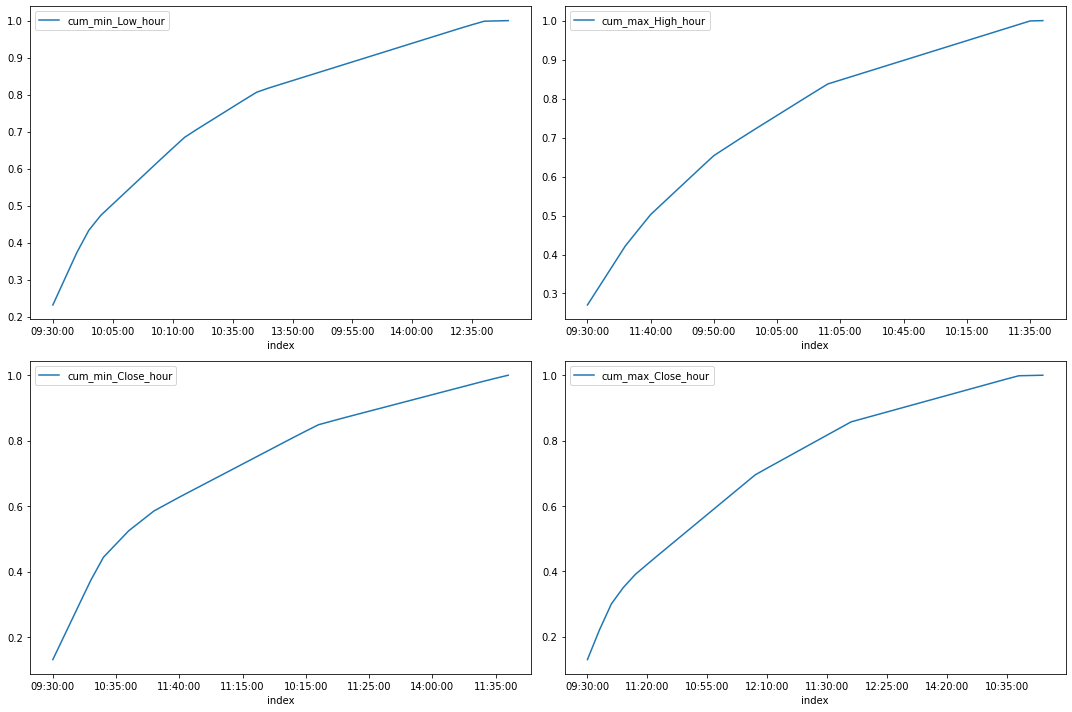

In [246]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

min_Low_hour = data['min_Low_hour'].value_counts().reset_index()
min_Low_hour['pct'] = min_Low_hour['min_Low_hour'] / min_Low_hour['min_Low_hour'].sum()
min_Low_hour['cum_min_Low_hour'] = min_Low_hour['pct'].cumsum()
min_Low_hour.plot('index','cum_min_Low_hour', ax=axes[0,0])


max_High_hour = data['max_High_hour'].value_counts().reset_index()
max_High_hour['pct'] = max_High_hour['max_High_hour'] / max_High_hour['max_High_hour'].sum()
max_High_hour['cum_max_High_hour'] = max_High_hour['pct'].cumsum()
max_High_hour.plot('index','cum_max_High_hour', ax=axes[0,1])

min_Close_hour = data['min_Close_hour'].value_counts().reset_index()
min_Close_hour['pct'] = min_Close_hour['min_Close_hour'] / min_Close_hour['min_Close_hour'].sum()
min_Close_hour['cum_min_Close_hour'] = min_Close_hour['pct'].cumsum()
min_Close_hour.plot('index','cum_min_Close_hour', ax=axes[1,0])

max_Close_hour = data['max_Close_hour'].value_counts().reset_index()
max_Close_hour['pct'] = max_Close_hour['max_Close_hour'] / max_Close_hour['max_Close_hour'].sum()
max_Close_hour['cum_max_Close_hour'] = max_Close_hour['pct'].cumsum()
max_Close_hour.plot('index','cum_max_Close_hour', ax=axes[1,1])


plt.tight_layout()
plt.show()

In [234]:
min_Low_hour['pct'] = min_Low_hour['min_Low_hour'] / min_Low_hour['min_Low_hour'].sum()
min_Low_hour.head()

,index,min_Low_hour,pct
0,09:30:00,572,0.231298
1,09:40:00,175,0.070764
2,09:35:00,175,0.070764
3,09:50:00,149,0.060251
4,10:00:00,100,0.040437


In [235]:
max_High_hour['pct'] = max_High_hour['max_High_hour'] / max_High_hour['max_High_hour'].sum()
max_High_hour.head()


,index,max_High_hour,pct
0,09:30:00,669,0.270522
1,10:40:00,125,0.050546
2,10:30:00,125,0.050546
3,09:35:00,125,0.050546
4,09:55:00,100,0.040437


In [255]:
AAPL = data[data['ticker']=='AAPL']
AAPL

,ticker,Date,dataInterval,min_Low,min_Close,max_High,max_Close,min_Low_hour,max_High_hour,min_Close_hour,max_Close_hour
0,AAPL,2022-10-31,5m,2022-10-31 10:20:00-04:00,2022-10-31 10:20:00-04:00,2022-10-31 09:35:00-04:00,2022-10-31 12:20:00-04:00,10:20:00,09:35:00,10:20:00,12:20:00
99,AAPL,2022-10-31,5m,2022-10-31 10:20:00-04:00,2022-10-31 10:20:00-04:00,2022-10-31 09:35:00-04:00,2022-10-31 12:20:00-04:00,10:20:00,09:35:00,10:20:00,12:20:00
198,AAPL,2022-10-31,5m,2022-10-31 10:20:00-04:00,2022-10-31 10:20:00-04:00,2022-10-31 09:35:00-04:00,2022-10-31 12:20:00-04:00,10:20:00,09:35:00,10:20:00,12:20:00
297,AAPL,2022-10-31,5m,2022-10-31 10:20:00-04:00,2022-10-31 10:20:00-04:00,2022-10-31 09:35:00-04:00,2022-10-31 12:20:00-04:00,10:20:00,09:35:00,10:20:00,12:20:00
396,AAPL,2022-10-31,5m,2022-10-31 10:20:00-04:00,2022-10-31 10:20:00-04:00,2022-10-31 09:35:00-04:00,2022-10-31 12:20:00-04:00,10:20:00,09:35:00,10:20:00,12:20:00
495,AAPL,2022-10-31,5m,2022-10-31 10:20:00-04:00,2022-10-31 10:20:00-04:00,2022-10-31 09:35:00-04:00,2022-10-31 12:20:00-04:00,10:20:00,09:35:00,10:20:00,12:20:00
594,AAPL,2022-10-31,5m,2022-10-31 10:20:00-04:00,2022-10-31 10:20:00-04:00,2022-10-31 09:35:00-04:00,2022-10-31 12:20:00-04:00,10:20:00,09:35:00,10:20:00,12:20:00
693,AAPL,2022-10-31,5m,2022-10-31 10:20:00-04:00,2022-10-31 10:20:00-04:00,2022-10-31 09:35:00-04:00,2022-10-31 12:20:00-04:00,10:20:00,09:35:00,10:20:00,12:20:00
792,AAPL,2022-10-31,5m,2022-10-31 10:20:00-04:00,2022-10-31 10:20:00-04:00,2022-10-31 09:35:00-04:00,2022-10-31 12:20:00-04:00,10:20:00,09:35:00,10:20:00,12:20:00
891,AAPL,2022-10-31,5m,2022-10-31 10:20:00-04:00,2022-10-31 10:20:00-04:00,2022-10-31 09:35:00-04:00,2022-10-31 12:20:00-04:00,10:20:00,09:35:00,10:20:00,12:20:00
